<a href="https://colab.research.google.com/github/PrabishaPradeep/DSA_Internship/blob/main/internship_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis and Loyalty Prediction

---



**Problem Statement :** analyze customer purchase behavior, satisfaction, and loyalty scores,using the data given and develop a predictive model that predicts customer satisfaction or loyalty based on user inputs.

**Dataset description**



*   **Age**: Age of the customer

*   **Items Purchased**: Number of items purchased in a single transaction

*   **Total Spent**: Total amount spent on the transaction

*   **Discount (%)**: Percentage discount on the purchase

*   **Satisfaction Score**: Self-reported customer satisfaction score

*   **Warranty Extension**: Whether the customer opted for warranty extension

*   **Gender**: Gender of the customer

*   **Region**: Customer's region

*   **Product Category**: Category of the purchased product

*   **Payment Method**: Payment method used (e.g., UPI, Cash)

*   **Revenue**: Total revenue from the customer

*   **Store Rating**: Rating given by the customer to the store

*   **Loyalty Score**: Customer's loyalty score

*   **Membership Status**: Whether the customer is a member

*   **Preferred Visit Time**: Preferred time of visit

**Import required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

**Read the dataset into python environment**

In [2]:
df=pd.read_csv(r"/content/customer_data.csv")
pd.set_option('display.max_columns',None)
df.head(5).round(2)

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.23,47.08,1.00,1,Male,South,Accessories,UPI,149.25,3.66,3.60,1.0,Evening
1,69,10,420.14,7.99,3.76,1,Female,South,Accessories,Cash,1485.52,3.55,25.76,1.0,Evening
2,46,4,127.74,37.23,1.77,1,Male,East,Laptop,Credit Card,85.55,3.92,7.02,1.0,Morning
3,32,9,417.72,8.23,1.93,0,Female,East,Tablet,UPI,824.12,3.86,7.64,1.0,Afternoon
4,60,13,608.03,5.00,3.90,0,Female,South,Tablet,UPI,2463.59,3.81,29.46,0.0,Morning


**Check basic information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [4]:
df.shape

(5000, 15)

Dataset has 15 features with 5000 entries. Among that, 10 features are numerical (7 float and 3 integer) and 5 are categorical features.

**Check for unique values**

In [5]:
(df.nunique()).sort_values(ascending=False)

,0
Total Spent,5000
Revenue,5000
Store Rating,4997
Loyalty Score,4962
Discount (%),4417
Satisfaction Score,2787
Age,52
Items Purchased,14
Product Category,5
Payment Method,5


Features ***'Warranty Extension'*** and **'Membership Status**' have  2 unique values out of 5000 entries which are 0 and 1.it is a binary variable, we can treat it as a categorical variable.

**Check for duplicates**

In [6]:
df.duplicated().sum()

0

***There are no duplicate entries in the dataset.***

## Exploratory data analysis

**Summary statistics of numerical features**

In [7]:
categorical = ['Gender', 'Region', 'Product Category', 'Payment Method','Warranty Extension', 'Membership Status', 'Preferred Visit Time']
numerical = ['Age', 'Items Purchased', 'Total Spent', 'Discount (%)','Satisfaction Score','Revenue', 'Store Rating','Loyalty Score']

In [8]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,43.58,14.92,18.00,31.00,43.00,56.00,69.00
Items Purchased,5000.0,7.54,4.01,1.00,4.00,7.00,11.00,14.00
Total Spent,5000.0,243.72,154.95,15.11,119.13,221.51,346.17,699.61
Discount (%),5000.0,26.62,13.59,5.00,15.38,27.85,38.09,48.49
Satisfaction Score,5000.0,2.65,1.53,1.00,1.00,2.34,4.13,5.00
Warranty Extension,5000.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
Revenue,5000.0,718.00,776.79,-201.43,164.70,380.55,1047.43,3523.47
Store Rating,4997.0,3.98,0.25,3.08,3.80,3.97,4.15,4.76
Loyalty Score,5000.0,15.64,9.14,0.00,7.94,13.97,23.52,39.24
Membership Status,4994.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00




*   The age of customers ranges from 18 to 69. the mean (43.58) slightly closer the median (43), indicating the distribution is approximately symmetric.
*   The average no of items purchased per single transaction is around 7. 75% of the customers likes to purchase below 11 number of items in a single transaction whereas only 25% customers buys above 11 items in a single transaction.
*   The satisfaction score ranges from 1 to 5 with an average score of around 2.65.indicating a somewhat average  level of customer satisfaction.
*   majority of the customers did not opt for a warranty extension, only 22% who did.
*   The negative revenue suggests there may be refunds, returns.
*   most of the store ratings are around 4.
*   The loyalty score ranges from 0 to 39.24 with an average score of around 15.64.
*   31% of the customers are members, while the 69% are not.





**Distribution of numerical features**

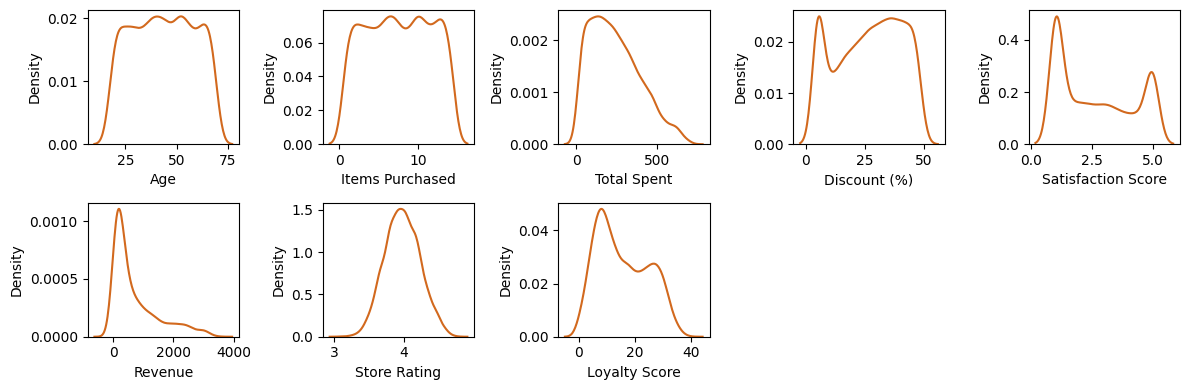

In [9]:
plt.figure(figsize=(12,4))
for i in range(0, len(numerical)):
    plt.subplot(2,5,i+1)
    sns.kdeplot(x=df[numerical[i]], color='chocolate')
    plt.tight_layout()

**Distribution of categorical features**

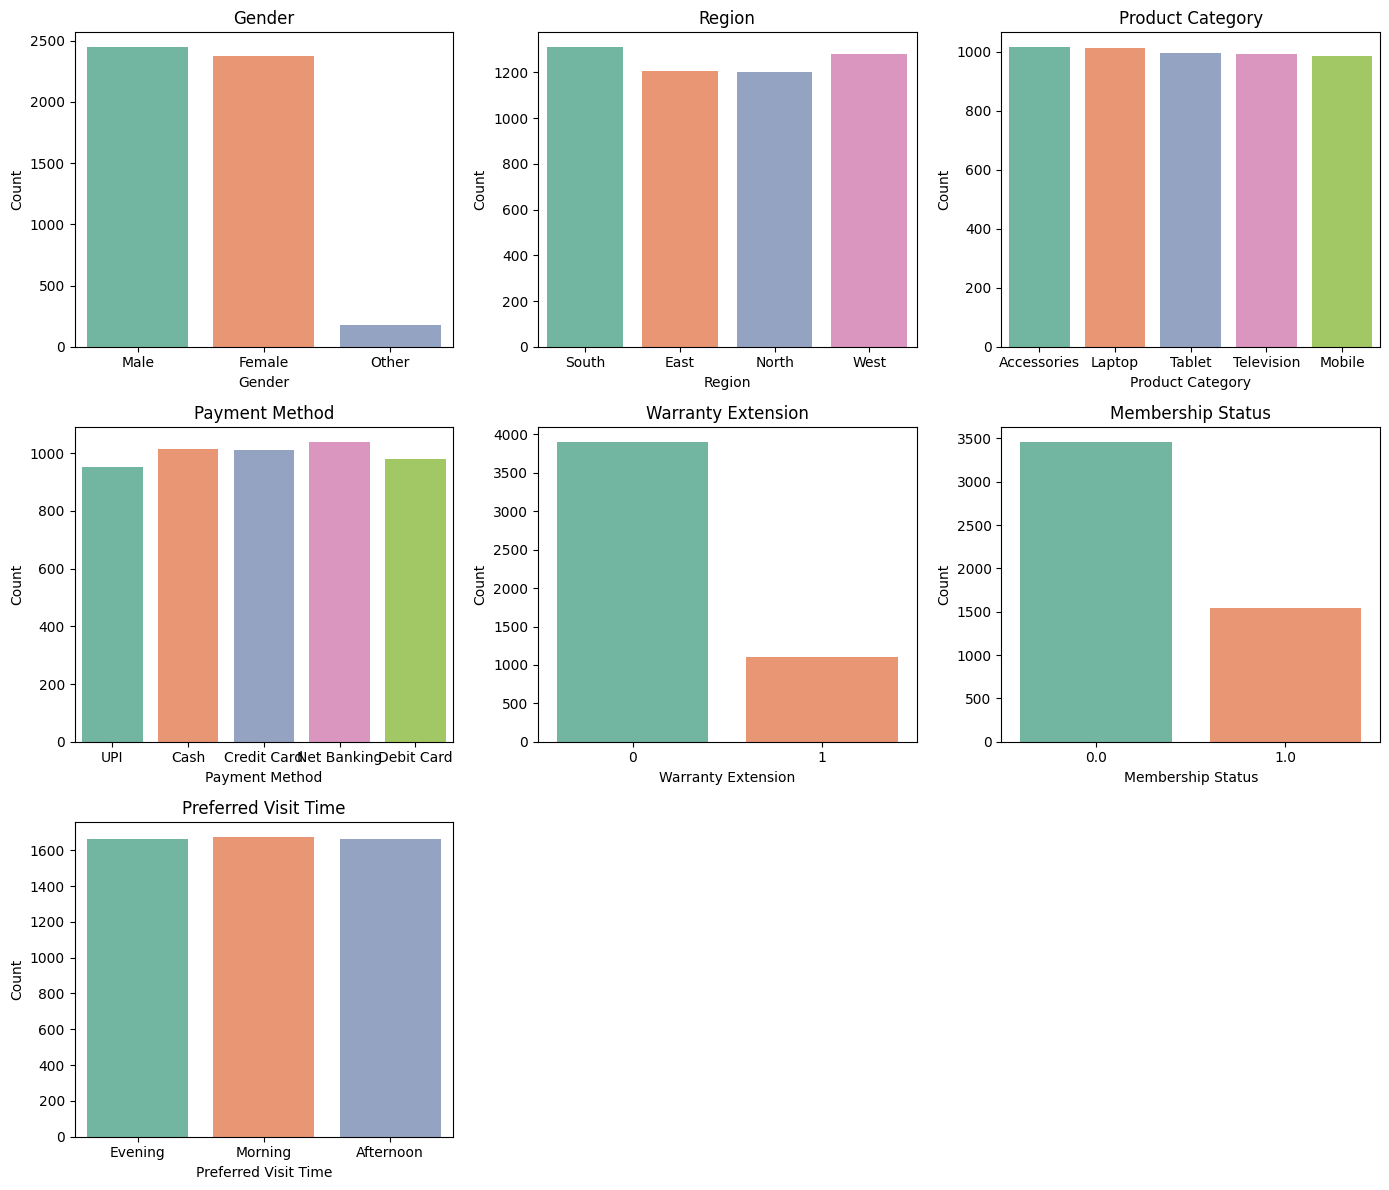

In [10]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


* the count of customers vary very lightly across region.
* comparatatively frequent payment methods are Net Banking  
* Most customers did not opt for a warranty extension or have any membership
* evening, Morning, and Afternoon are almost equally preferred as visit times.

**Distribution of Loyalty Score**

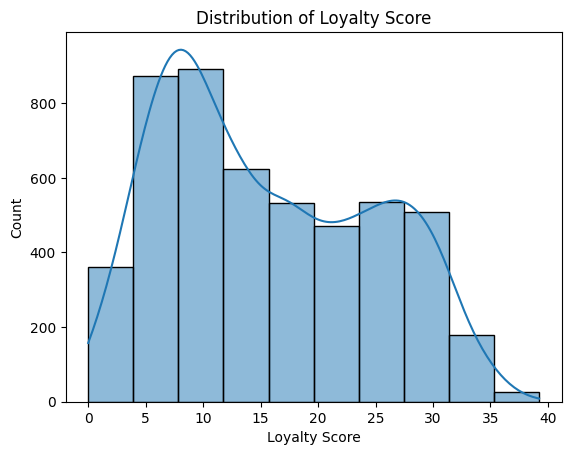

In [11]:
sns.histplot(df['Loyalty Score'], bins=10, kde=True)
plt.title('Distribution of Loyalty Score')
plt.show()

The graph shows a positively skewed distribution, with most of the customers have  loyalty scores in the range 5-10 which is very low.only smaller group of customers have high loyalty scores.

**Distribution of Satisfaction Scores**

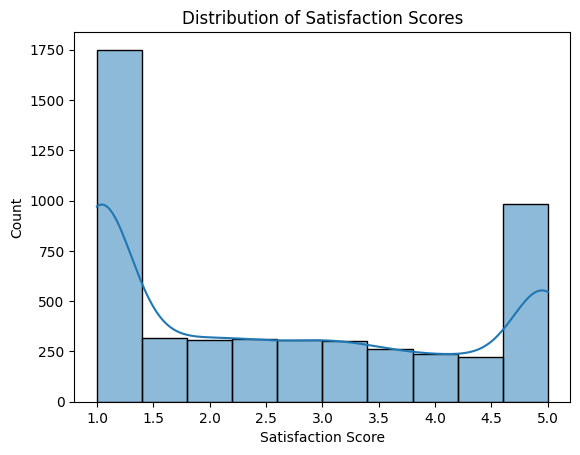

In [12]:
sns.histplot(df['Satisfaction Score'], bins=10, kde=True)
plt.title('Distribution of Satisfaction Scores')
plt.show()

The graph shows a bimodal distribution.first peak shows most of the customers have given very low satisfaction score of 1 and second peak at the end shows some customers gave a high satisfaction rating of 5 but the first peak is much larger than the second peak.

**Check for outliers**

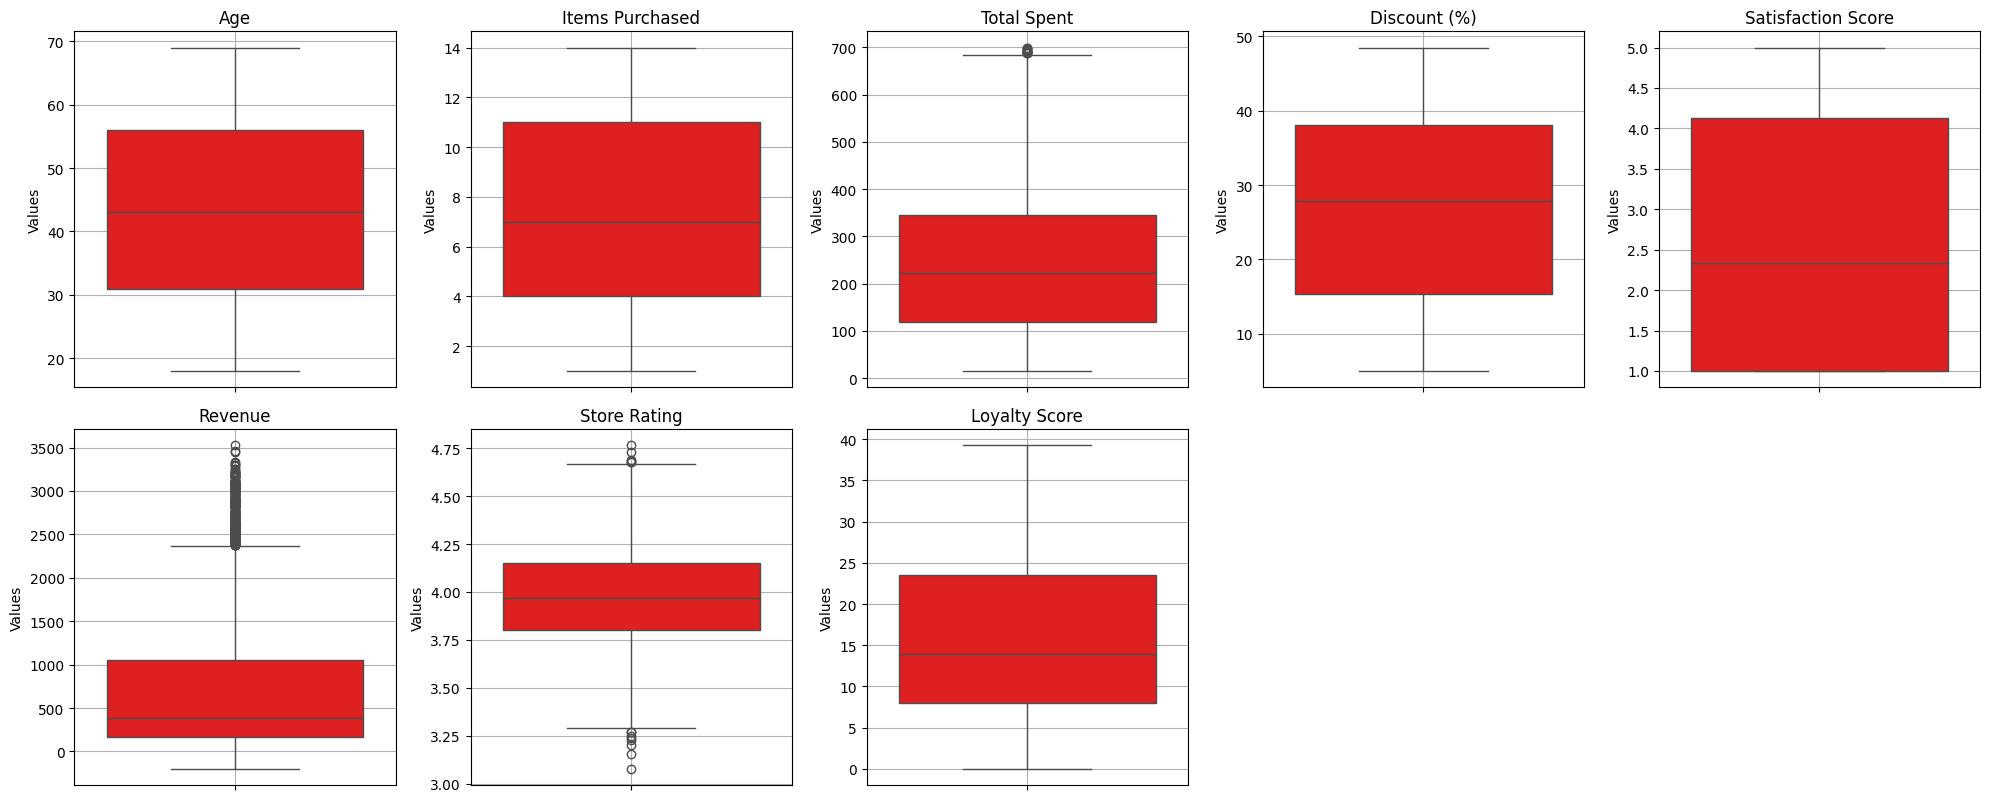

In [13]:
plt.figure(figsize=(20,20))
for i, col in enumerate(numerical):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(df[col],color='red')
    plt.title(f'{col}')
    plt.ylabel('Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

these boxplots shows there are quite a lot of outliers in some of the variables.

**Multivariate data analysis**

**Correlation**

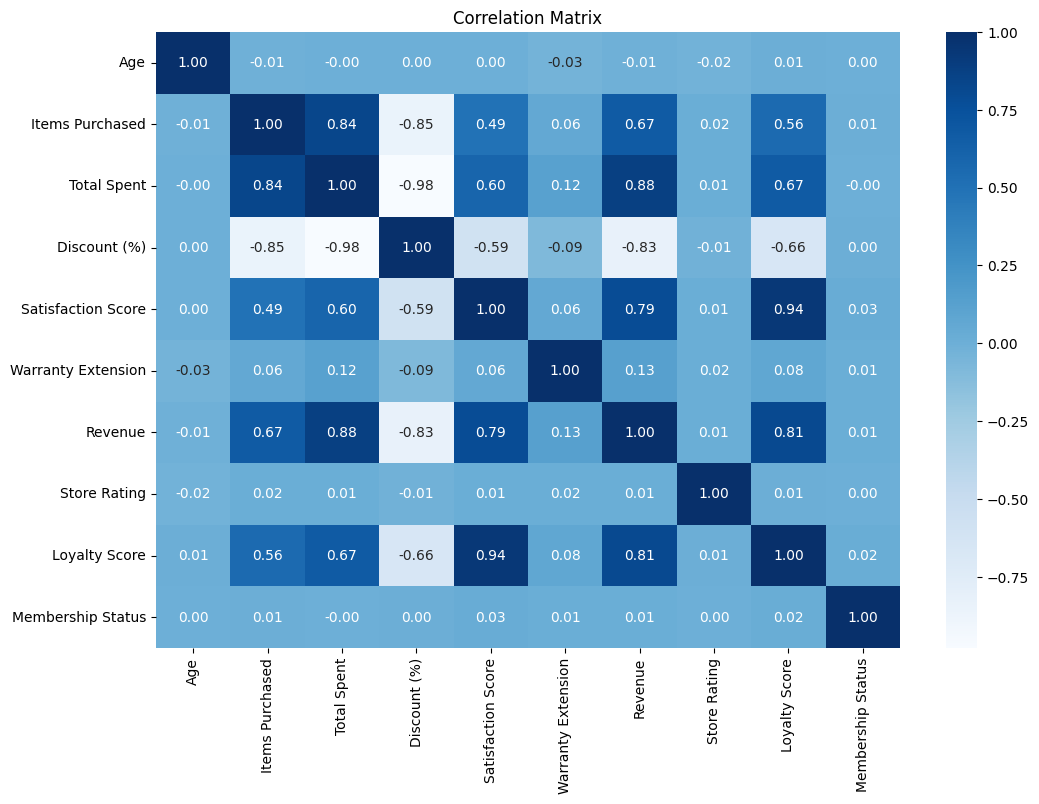

In [14]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()
corr
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



*   The correlation coefficient between Age and Loyalty Score is approximately 0.0093,shows very weak correlation suggests that Age has almost no direct linear impact on Loyalty Score.
*   Revenue & Total Spent have Strong positive correlation of 0.88, means customers with higher revenue genrally spend more .
*   Satisfaction Score & Loyalty Score have Very strong positive correlation of 0.94, indicates that customers with higher satisfaction score are very much loyal to the store.
*   revenue and loyalty score have strong positive correlation 0.81
*   the correlation between item purchased and loyalty score is 0.56 which shows moderately strong positive correlation. it suggests that customers who purchase more tend to have high loyalty scores.
*   The correlation between discount(%) and loyalty score (-0.66) indicates a strong negative correlation  This means that as the discount percentage increases, the loyalty score tends to decrease.





   



**Impact of item purchased and total spent on satisfaction score**

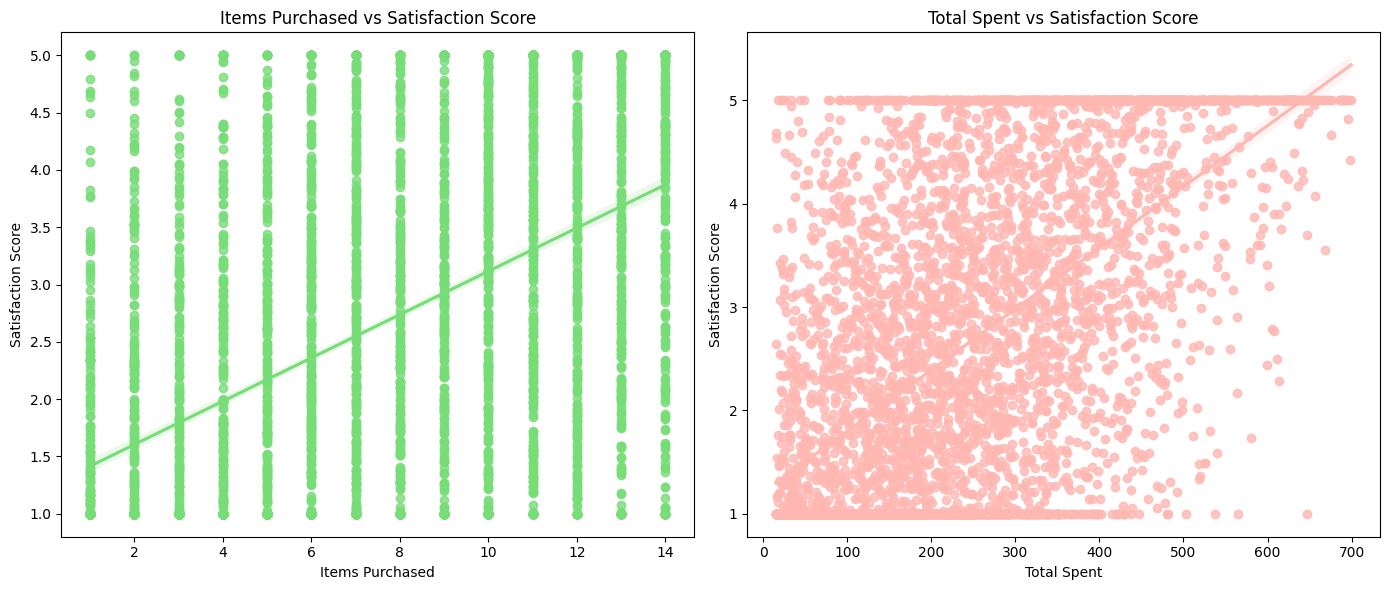

In [15]:
colors = ['#77DD77', '#FFB7B2']

plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Items Purchased', 'Total Spent'], colors), start=1):
    plt.subplot(1, 2, idx)
    sns.regplot(x=i, y='Satisfaction Score', data=df, color=color)
    plt.title(f'{i} vs Satisfaction Score')
    plt.xlabel(i)
    plt.ylabel('Satisfaction Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the plots show a positive trend.as the item purchased and total spent increases satisfaction score also increases.it shows that if the customer is satisfied they will spent more and buy more .

**Impact of item purchased and total spent on loyalty score**

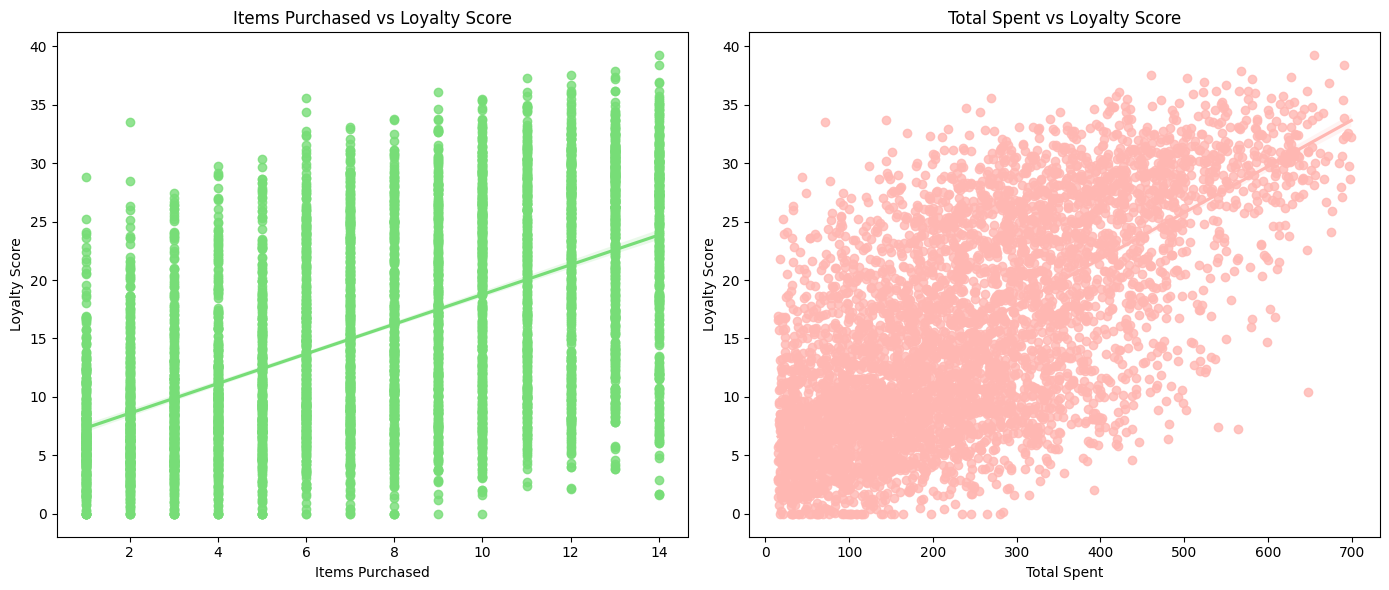

In [16]:
colors = ['#77DD77', '#FFB7B2']

plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Items Purchased', 'Total Spent'], colors), start=1):
    plt.subplot(1, 2, idx)
    sns.regplot(x=i, y='Loyalty Score', data=df, color=color)
    plt.title(f'{i} vs Loyalty Score')
    plt.xlabel(i)
    plt.ylabel('Loyalty Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the plots show a positive trend. customers who buy more and spent more will usually have high loyalty score

 **Impact of Discount(%) on Loyalty Score**

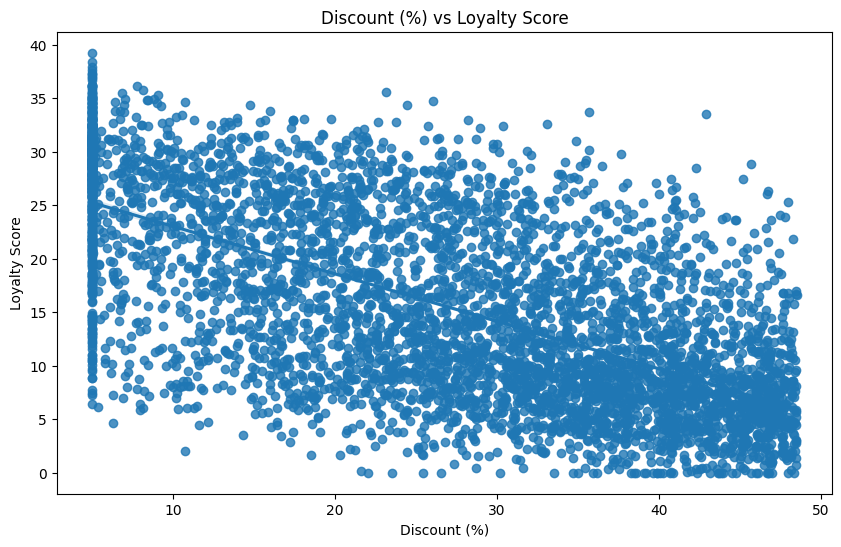

In [17]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Discount (%)', y='Loyalty Score', data=df)
plt.title( 'Discount (%) vs Loyalty Score')
plt.xlabel('Discount (%)')
plt.ylabel('Loyalty Score')
plt.show()


The scatter plot shows negative relationship. higher
the discounts lower the loyalty scores.

**Impact of Satisfaction Score on Loyalty Score**

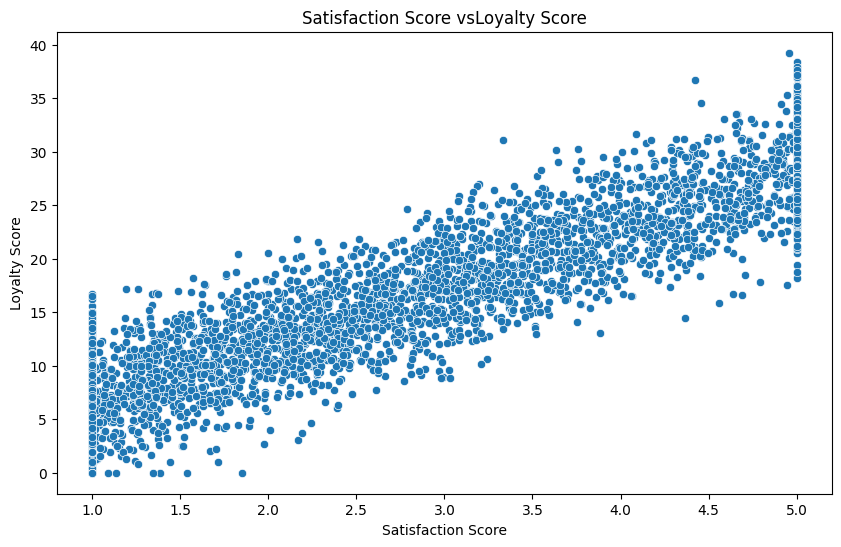

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Satisfaction Score', y='Loyalty Score', data=df)
plt.title('Satisfaction Score vsLoyalty Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Loyalty Score')
plt.show()


shows a postive linear relationship

**Gender impact on loyalty score**

<Axes: ylabel='Loyalty Score'>

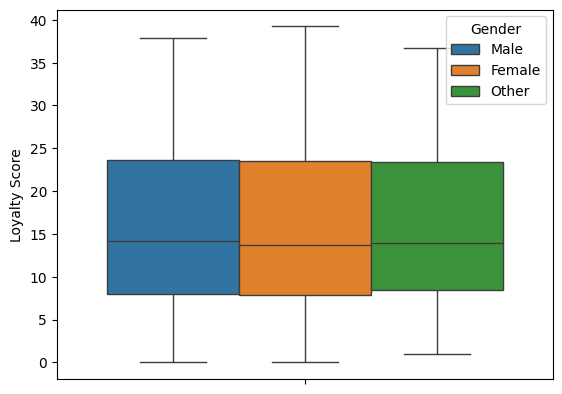

In [19]:
sns.boxplot(data=df,y='Loyalty Score',hue='Gender')

box plot shows a little differences but not that significant.

**payment method vs loyalty score**

<Axes: ylabel='Loyalty Score'>

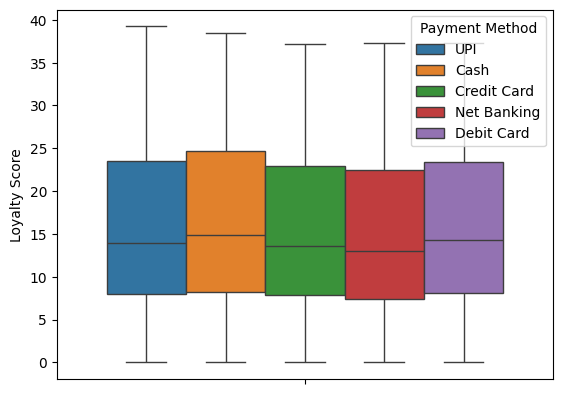

In [20]:
sns.boxplot(data=df,y='Loyalty Score',hue='Payment Method')

**Warranty Extension impact on Loyalty Score**

<Axes: ylabel='Loyalty Score'>

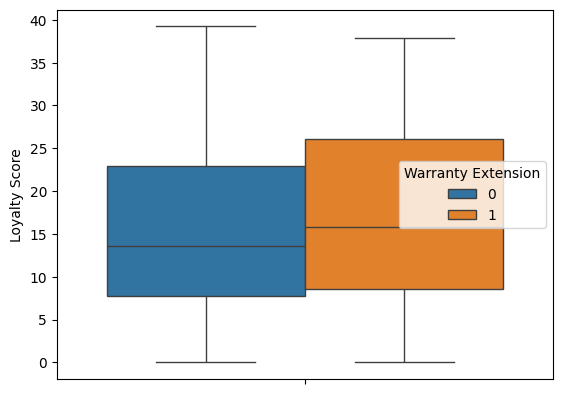

In [21]:
sns.boxplot(data=df,y='Loyalty Score',hue='Warranty Extension')

**membership status impact on loyalty score**

<Axes: ylabel='Loyalty Score'>

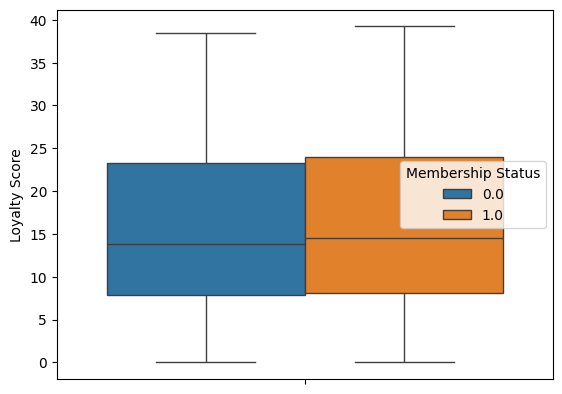

In [22]:
sns.boxplot(data=df,y='Loyalty Score',hue='Membership Status')

**preferred visit time vs loyalty score**

<Axes: ylabel='Loyalty Score'>

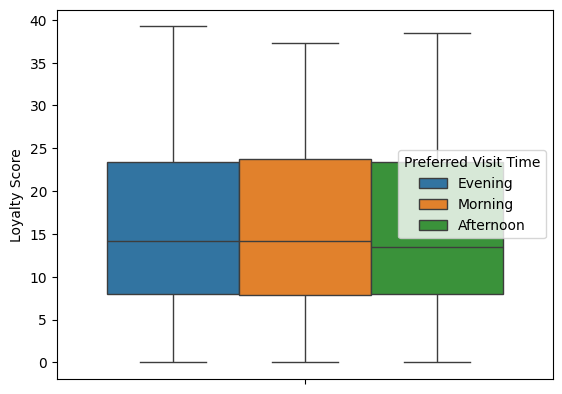

In [23]:
sns.boxplot(data=df,y='Loyalty Score',hue='Preferred Visit Time')

**impact of loyalty score on store rating**

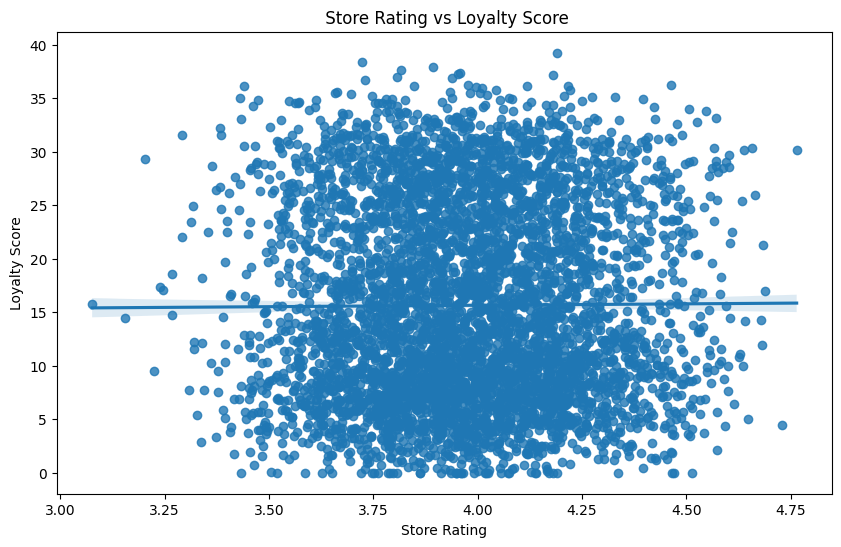

In [24]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Store Rating', y='Loyalty Score', data=df)
plt.title(' Store Rating vs Loyalty Score')
plt.xlabel('Store Rating')
plt.ylabel('Loyalty Score')
plt.show()

the scatterplot shows no linear relationship between store rating given by customers and their loyalty score.

**Segment customer data based on Region and Product Category**

In [25]:
region_analysis = df.groupby('Region').agg({'Satisfaction Score': 'mean', 'Loyalty Score': 'mean'})
print(region_analysis)
print('--------------------------------------------------------------------------------------------------------------')
product_analysis = df.groupby('Product Category').agg({'Satisfaction Score': 'mean', 'Loyalty Score': 'mean'})
print(product_analysis)

        Satisfaction Score  Loyalty Score
Region                                   
East              2.664952      15.726079
North             2.688928      15.910227
South             2.625350      15.462415
West              2.625032      15.480349
--------------------------------------------------------------------------------------------------------------
                  Satisfaction Score  Loyalty Score
Product Category                                   
Accessories                 2.667060      15.810278
Laptop                      2.599353      15.272068
Mobile                      2.617103      15.357037
Tablet                      2.657758      15.787878
Television                  2.709702      15.965189



*   North region has comparatively more satisfaction score (2.6889) and loyalty score (15.9102) South regions shows lowest satisfaction and loyalty scores.
*   Television shows the highest satisfaction (2.7097) and loyalty score (15.9652), indicating that customers are more satisfied with buying televisions and may be more loyal to the brand/product.
*   Laptop has the lowest satisfaction (2.5994) and loyalty (15.2721) scores, suggesting potential dissatisfaction in this category, which could impact customer loyalty.







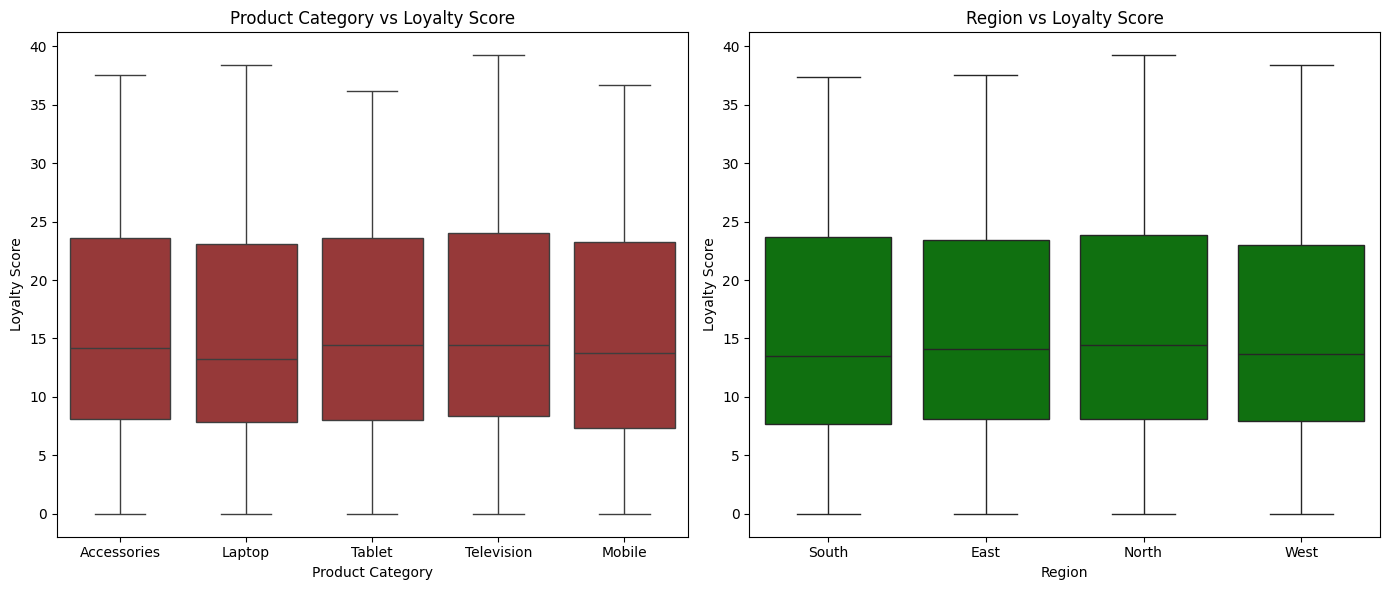

In [26]:
plt.figure(figsize=(14, 6))
for idx, (i, color) in enumerate(zip(['Product Category','Region'], ['brown', 'green']), start=1):
    plt.subplot(1, 2, idx)
    sns.boxplot(x=i, y='Loyalty Score', data=df, color=color)
    plt.title(f'{i} vs Loyalty Score')
    plt.xlabel(i)
    plt.ylabel('Loyalty Score')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

both the box plots  shows slight variations but the overall pattern suggests that there might not be any significant difference in loyalty scores


# Data Pre - Processing

**Check for null values**

In [27]:
df.isnull().sum().sort_values(ascending=False)

,0
Preferred Visit Time,8
Membership Status,6
Payment Method,4
Store Rating,3
Gender,2
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0


Null values are present in  ***Preferred Visit Time*** (8) ,***Membership Status*** (6) ,***Store Rating*** (3) ,***Payment Method*** (4) and ***Gender*** (2).

**null value handling**

In [28]:
df['Store Rating'].skew()

0.06205044100101463


*   Store Rating (shows a skewness 0.06 which is very close to zero) shows a nearly normal distribution ,we can use mean to fill null values.

*   The Membership Status column is ordinal.so Using the median for imputation is robust to outliers and is suitable for skewed distributions.

*   null values in categorical variables like Gender, Payment Method, and Preferred Visit Time can be handled Using the mode .


In [29]:
df['Store Rating'] = df['Store Rating'].fillna(df['Store Rating'].mean())
df['Membership Status'] = df['Membership Status'].fillna(df['Membership Status'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Payment Method'] = df['Payment Method'].fillna(df['Payment Method'].mode()[0])
df['Preferred Visit Time'] = df['Preferred Visit Time'].fillna(df['Preferred Visit Time'].mode()[0])

In [30]:
# check null values again

df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,0
Region,0
Product Category,0
Payment Method,0


All null values are imputed properly.

**Outlier Handling**

In [31]:
# Calculate IQR and identify outliers for numerical columns
for column in numerical:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column} : {len(outliers)}")


Outliers in Age : 0
Outliers in Items Purchased : 0
Outliers in Total Spent : 13
Outliers in Discount (%) : 0
Outliers in Satisfaction Score : 0
Outliers in Revenue : 301
Outliers in Store Rating : 14
Outliers in Loyalty Score : 0


In [32]:
outlier_col = ['Total Spent', 'Revenue', 'Store Rating']

for i in outlier_col:
    Q1 = np.percentile(df[i], 25, method='midpoint')
    Q3 = np.percentile(df[i], 75, method='midpoint')
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR

    # Clip outliers in the column
    df[i] = df[i].clip(upper=up_lim, lower=low_lim)

    print(f"Clipping completed for {i}. Values outside the IQR bounds are clipped.")


Clipping completed for Total Spent. Values outside the IQR bounds are clipped.
Clipping completed for Revenue. Values outside the IQR bounds are clipped.
Clipping completed for Store Rating. Values outside the IQR bounds are clipped.


**Recheck for outliers**

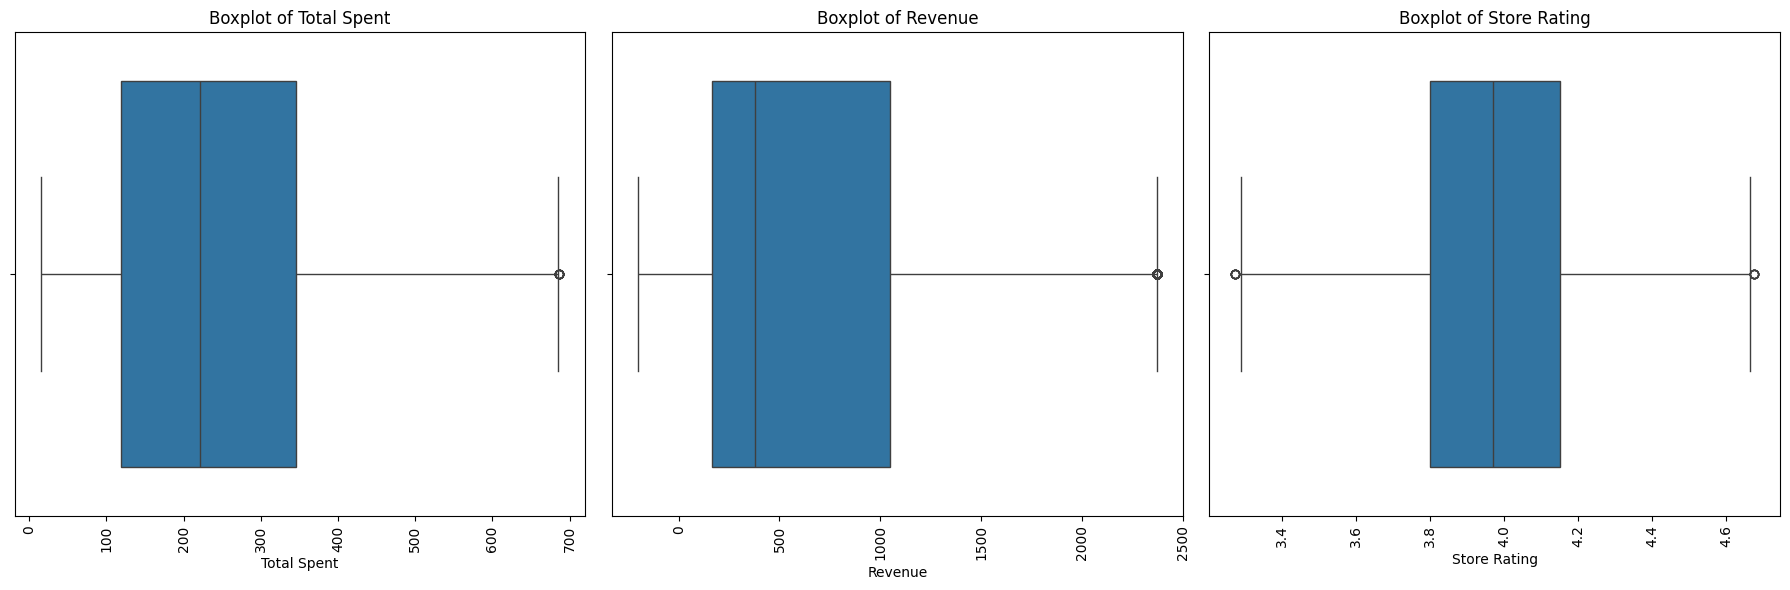

In [33]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the columns in outlier_col and plot each in the corresponding subplot
for i, col in enumerate(outlier_col):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Display the plots
plt.tight_layout()
plt.show()

**Encoding**

In [34]:
categorical_columns=['Gender','Payment Method','Preferred Visit Time','Region','Product Category']

In [35]:
for i in df.columns:
  if df[i].dtype=='object':
    print(df[i].unique())

['Male' 'Female' 'Other']
['South' 'East' 'North' 'West']
['Accessories' 'Laptop' 'Tablet' 'Television' 'Mobile']
['UPI' 'Cash' 'Credit Card' 'Net Banking' 'Debit Card']
['Evening' 'Morning' 'Afternoon']


In [36]:
from sklearn.preprocessing import OneHotEncoder #one hot encoding
encoder=OneHotEncoder(drop='first')
encoded_data=pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray(),columns=encoder.get_feature_names_out())
# Concatenate the one-hot encoded columns with the original DataFrame
data_encoded = pd.concat([df.drop(categorical_columns, axis=1),encoded_data], axis=1)


**Spitting the dataset into x and y**

In [37]:
# Spliting data as Independent and Dependent Variables
x=data_encoded.drop('Loyalty Score',axis=1)
y=data_encoded['Loyalty Score']

**min max scaling**

In [38]:
#Scaling
#Minmax scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled.head()


,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Membership Status,Gender_Male,Gender_Other,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_Net Banking,Payment Method_UPI,Preferred Visit Time_Evening,Preferred Visit Time_Morning,Region_North,Region_South,Region_West,Product Category_Laptop,Product Category_Mobile,Product Category_Tablet,Product Category_Television
0,0.745098,0.000000,0.021021,0.967531,0.000000,1.0,0.136285,0.275508,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.692308,0.602965,0.068654,0.690074,1.0,0.655603,0.197745,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.549020,0.230769,0.167679,0.741001,0.192810,1.0,0.111529,0.462854,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.274510,0.615385,0.599363,0.074219,0.231708,0.0,0.398560,0.418286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.823529,0.923077,0.882669,0.000000,0.725732,0.0,1.000000,0.384297,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


**Feature Engineering**

In [39]:
# create two new features

# 1.ratio of "Total Spent" to "Items Purchased"
df['Spend per Item'] = df['Total Spent'] / df['Items Purchased']

# 2."Discounted Spend"
df['Discounted Spend'] = df['Total Spent'] * (1 - (df['Discount (%)']/100))

In [40]:
# Drop Orginal Features
df= df.drop(columns=['Items Purchased','Total Spent',], axis=1)


**Feature Selection**

In [41]:
#using mutual info regression
#calculating mutual information
from sklearn.feature_selection import mutual_info_regression
selector=mutual_info_regression(x_scaled,y)
selector=pd.Series(selector,index=x.columns, name="Mutual Information")
select=selector.sort_values(ascending=False)
print(select)

Satisfaction Score              0.916939
Revenue                         0.563585
Total Spent                     0.308772
Discount (%)                    0.297791
Items Purchased                 0.183881
Membership Status               0.014120
Age                             0.013708
Preferred Visit Time_Evening    0.011968
Region_South                    0.007444
Product Category_Television     0.005949
Product Category_Mobile         0.004417
Region_North                    0.003990
Payment Method_Credit Card      0.003728
Product Category_Tablet         0.003529
Warranty Extension              0.002794
Gender_Other                    0.000000
Gender_Male                     0.000000
Payment Method_Net Banking      0.000000
Payment Method_UPI              0.000000
Store Rating                    0.000000
Preferred Visit Time_Morning    0.000000
Region_West                     0.000000
Product Category_Laptop         0.000000
Payment Method_Debit Card       0.000000
Name: Mutual Inf

In [42]:
#feature Selection
# Import necessary libraries
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
# Calculate mutual information scores
mi_scores = mutual_info_regression(x_scaled, y)
mi_scores_series = pd.Series(mi_scores, index=x_scaled.columns, name="Mutual Information")

# Sort scores in descending order and select top N features
top_features = mi_scores_series.sort_values(ascending=False).index[:6]

# Filter x_scaled to retain only the top features
x_selected = x_scaled[top_features]

#  the final selected features
print("Selected features:", x_selected.columns.tolist())

Selected features: ['Satisfaction Score', 'Revenue', 'Total Spent', 'Discount (%)', 'Items Purchased', 'Membership Status']


feature enineering done using mutual mutual_info_regression.  6 features are Selected according to their information gain.


**Model Selection and Testing**


In [43]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

**Linear Regression**

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr = LinearRegression()

# Train the model using the training data
model=lr.fit(x_train,y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.06774205626736
R-squared: 0.8901845071687857


**random forest**

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model= RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.753563452824842
R-squared: 0.8818788215648269


**DecisionTree Regression**

In [48]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

# Fit the model to the data
dt_model.fit(x_train, y_train)

# make prediction
y_pred_DT = dt_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 9.753563452824842
R-squared: 0.8818788215648269
